# Prediction using Supervised ML algorithm

# The Spark Foundation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [6]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

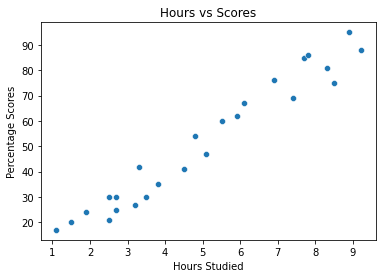

In [11]:
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

In [16]:
#preparing the data for modeling
X = df.iloc[:, :-1]
y = df.iloc[:, 1]

In [20]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [21]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [22]:
#Now we have attribute and labels next step is to split the data into training and test sets foe this we use scikit learn library.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [24]:
#predicting in test data
y_pred = lr.predict(X_test)

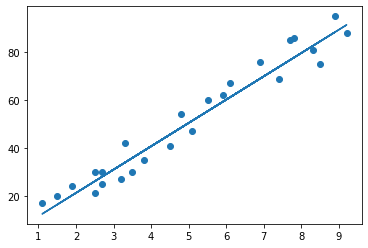

In [27]:
#plotting the regression line
line = lr.coef_*X+lr.intercept_

#plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [36]:
#comparing actual vs prediction
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
15,95,88.446633
24,86,77.732028
14,17,12.470343
19,69,73.835808
13,42,33.899553


In [37]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9466449081971943

In [38]:
#evaluation the model
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean_absolute_error is',mean_absolute_error(y_test,y_pred))
print('mean_squared_error is',mean_squared_error(y_test,y_pred))

Mean_absolute_error is 6.457450193167183
mean_squared_error is 44.1652107906905


In [40]:
print("If student studies for 9.25 hours/day then will approximately score {}".format (lr.predict([[9.25]])))

If student studies for 9.25 hours/day then will approximately score [91.85582532]
